In [ ]:
import nltk
import os

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Part Of speech - POS Tags
* Generally speaking, the “grammatical type” of word:
Verb, Noun, Adjective, Adverb, Article, etc.,
* Indicates meaning and grammatical uses of a word within the sentence
* The same word can fit in different parts of speech subject to the context in which
they are used. For e.g.: “Google Something on the internet”. Here google is used as a
verb although it’s a proper noun
<img src="https://raw.githubusercontent.com/ankitaj85/images/main/tags.png" >

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Example 1

In [ ]:
# Let us consider a string and check how NLTK performs POS tagging on it:
sent = "Mary is driving a big car."
sent_tokens = word_tokenize(sent)

In [ ]:
# Use the pos_tag( ) function from the NLTK library to tag the tokens
for token in sent_tokens:
   print(nltk.pos_tag([token]))

[('Mary', 'NNP')]
[('is', 'VBZ')]
[('driving', 'VBG')]
[('a', 'DT')]
[('big', 'JJ')]
[('car', 'NN')]
[('.', '.')]


## Example 2

In [ ]:
sent2 = "John is eating a delicious cake"
sent2_tokens = word_tokenize(sent2)
for token in sent2_tokens:
  print(nltk.pos_tag([token]))

[('John', 'NNP')]
[('is', 'VBZ')]
[('eating', 'VBG')]
[('a', 'DT')]
[('delicious', 'JJ')]
[('cake', 'NN')]


## Example 3

In [ ]:
sent3= "Jim eats a banana"
sent3_tokens = word_tokenize(sent3)
for tokens in sent3_tokens:
  print(nltk.pos_tag([tokens]))

[('Jim', 'NNP')]
[('eats', 'NNS')]
[('a', 'DT')]
[('banana', 'NN')]


In [ ]:
reg_tokenizer = RegexpTokenizer('(?u)\W+|\$[\d\.]+|\S+')

In [ ]:
regex_tokenize = reg_tokenizer.tokenize(sent3)

In [ ]:
#Now, Let us tokenize the same using Regular Expression tokenizer:
regex_tokenize

['Jim', ' ', 'eats', ' ', 'a', ' ', 'banana']

In [ ]:
# Now, we will tag all the tokens and get a list of tag for all the tokens:
regex_tag = nltk.pos_tag(regex_tokenize)
regex_tag

[('Jim', 'NNP'),
 (' ', 'NNP'),
 ('eats', 'VBZ'),
 (' ', 'VBP'),
 ('a', 'DT'),
 (' ', 'NN'),
 ('banana', 'NN')]

## Display Pos Tag From Corpora gutenberg (is data of long text i.e story, poem)

In [ ]:
nltk.download('gutenberg')

NameError: ignored

In [ ]:
print(os.listdir(nltk.data.find("corpora")))

In [ ]:
nltk.corpus.gutenberg.fileids()

In [ ]:
hamlet=nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

In [ ]:
len(hamlet) # No. of Words

In [ ]:
hamlet_pos = []

In [ ]:
for word in hamlet[:2000]:
    word_pos=nltk.pos_tag([word])
    hamlet_pos.append(word_pos)

In [ ]:
hamlet_pos

# Named Entity Recognition (NER)





In [ ]:
# To use NER in Python, you will have to import the “ne_chunk” from the NLTK module in Python:
from nltk import ne_chunk

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## Example 1

In [ ]:
# Consider a text data:
NE_sent = "The US President stays in the White House"
# Now, let’s tokenize the sentence and also add part of speech tags to the same:
NE_tokens = word_tokenize(NE_sent)
NE_tags = nltk.pos_tag(NE_tokens)

In [ ]:
NE_NER = ne_chunk(NE_tags)
print(NE_NER)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  the/DT
  (FACILITY White/NNP House/NNP))


In [ ]:
NE_NER = ne_chunk(NE_tags)

In [ ]:
print(NE_NER)

(S
  The/DT
  (ORGANIZATION US/NNP)
  President/NNP
  stays/VBZ
  in/IN
  the/DT
  (FACILITY White/NNP House/NNP))


## Example 2

In [ ]:
NE_sent2 = "The state of New York touches the Atlantic Ocean"

In [ ]:
print(ne_chunk(nltk.pos_tag(word_tokenize(NE_sent2))))

(S
  The/DT
  state/NN
  of/IN
  (GPE New/NNP York/NNP)
  touches/VBZ
  the/DT
  (ORGANIZATION Atlantic/NNP Ocean/NNP))


## Example 3

In [ ]:
NE_sent3 = "Apple is a fruit and Apple is a Company's name"

In [ ]:
print(ne_chunk(nltk.pos_tag(word_tokenize(NE_sent3))))

NameError: ignored

# Chunking



In [ ]:
sent = "The little mouse ate the fresh cheeze"
sent_tokens = nltk.pos_tag(word_tokenize(sent))
sent_tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('mouse', 'NN'),
 ('ate', 'VB'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('cheeze', 'NN')]

## Example 1
We will now create a grammar from a noun phrase and mention the tags that we want in our chunk phrase
within { }, here we have created a regular expression matching string:

In [ ]:
!pip3 install svgling #https://github.com/rawlins/svgling # https://github.com/nltk/nltk/issues/1765

     |████████████████████████████████| 71kB 3.9MB/s 


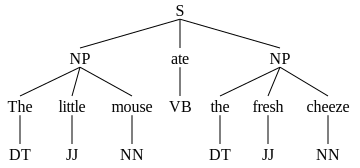

In [ ]:
import svgling
grammar_np = r"NP: {<DT>?<JJ>*<NN>}"
# We will now have to parse the chunk; hence we’ll create a chunk parser and pass our noun phrase string to it:
chunk_parser = nltk.RegexpParser(grammar_np)
# The parser is now ready, and we will use the parse ( ) within our chunk parser to parse our sentence:
chunk_result = chunk_parser.parse(sent_tokens)


svgling.draw_tree(chunk_result)

## Example 2

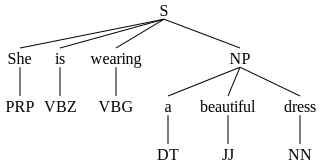

In [ ]:
# Let us consider another sentence below:
sent2 = 'She is wearing a beautiful dress'
# Convert the sentence to tokens and add Pos tags to the same:
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))
# We will now have to parse the chunk; hence we will create a chunk parser and pass our noun phrase string to it:
chunk_result2 = chunk_parser.parse(sent_tokens2)
svgling.draw_tree(chunk_result2)

## Example 3

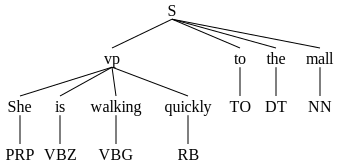

In [ ]:
# Let us create a verb phrase chunk now using regular expressions:
grammar_vp = r"vp: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
# We will now create another chunk_parser and will pass the verb phrase string to it:
chunk_parser2 = nltk.RegexpParser(grammar_vp)
# Create another sentence, and we will tokenize the same, adding pos tags to it:
sent3 = "She is walking quickly to the mall"
sent_tokens3 = nltk.pos_tag(word_tokenize(sent3))
# We will use the new verb phrase parser to parse the tokens and run the results:
chunk_result3 = chunk_parser2.parse(sent_tokens3)
svgling.draw_tree(chunk_result3)

## Example 4

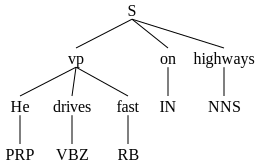

In [ ]:
# Let us consider another sentence below and add speech tags to it, post tokenization:
sent4 = "He drives fast on highways"
sent_tokens4 = nltk.pos_tag(word_tokenize(sent4))
# We will use the new verb phrase parser to parse the tokens and run the results:
chunk_result4 = chunk_parser2.parse(sent_tokens4)
svgling.draw_tree(chunk_result4)

# Chinking

## Chinking - NLTK
Let us create a chinking grammar string containing three things:
*  Chunk name
*  The regular expression sequence of a chunk
* The regular expression sequence of our chink

In [ ]:
chink_grammar = r"""
chk_name: #chunk name
{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?} #chunk regex sequence
}<RB>+{ #chink regex sequence - adverb
"""

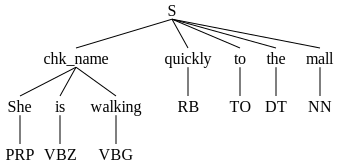

In [ ]:
# We will now create a parser from nltk.RegexpParser and will pass the chink_grammar to it:
chink_parser = nltk.RegexpParser(chink_grammar)
svgling.draw_tree(chink_parser.parse(sent_tokens3))

# Implementing CFG’s in Python
* CFG in layman’s
terms is a simple
grammar, where
certain rules describe
possible
combinations of
words and phrases

* CFG is a tuple with
four values: (N, ∑, R, S)
  * N, a finite set of
terminal symbols
  * ∑ is the alphabet,
a finite set of
terminal symbols
  * R is the set of
production rules
  * S is the start of
symbol € N
* Generates a language L
by capturing
constituency and
ordering




In [ ]:
from nltk.parse.generate import generate, demo_grammar
# Consider the below string, where we have laid certain rules:
CFG_grammar = nltk.CFG.fromstring("""
S -> X Y
X -> A B
A -> "saw"|"met"
Y -> "John"|"Jim"
B -> "dog"|"cat"
""")

In [ ]:
# Let us check the possible list of sentences that can be generated using the rules:
for sentence in generate(CFG_grammar):
  print(" ".join(sentence))

saw dog John
saw dog Jim
saw cat John
saw cat Jim
met dog John
met dog Jim
met cat John
met cat Jim


In [ ]:
# You can check the different rules of grammar for the sentence formation using the productions( ):
CFG_grammar.productions()

[S -> X Y,
 X -> A B,
 A -> 'saw',
 A -> 'met',
 Y -> 'John',
 Y -> 'Jim',
 B -> 'dog',
 B -> 'cat']

# Automating Text Paraphrasing in Python

In [ ]:
def cfg_parse(sentence):
  sent_tk = nltk.pos_tag(word_tokenize(sentence))
  for one in sent_tk:
    if one[1] == 'NNP':
      s_NP = "\'" + one[0] + "\'"
    if one[1] == 'VBD' or one[1]=='VBN':
      s_V = "\'" + one[0] + "\'"
    if one[1] == 'NN':
      s_N = "\'" + one[0] + "\'"
    else:
      pass
  cfg_grammar2 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V N
  NP -> {}
  V -> {}
  N -> {}
  """.format(s_NP,s_V,s_N))
  for sentence in generate(cfg_grammar2):
    print(" ".join(sentence))
  return   

In [ ]:
cfg_parse("John saw a long white boat")

John saw boat


In [ ]:
cfg_parse("John saw a cat")

John saw cat


In [ ]:
cfg_parse("A cat was seen by John")

John seen cat


In [ ]:
cfg_parse("A Cat was seen by john") # Wrong

Cat seen john


Because cat with upper case ‘C’ is a proper noun and
John with a lower case ‘j’ is a common noun, and with
respect to our CFG rule, the proper noun should come
first. Therefore, when working with CFG’s and
complicated sentences other complex parsers are used

In [ ]:
nltk.pos_tag(word_tokenize("A Cat was seen by john"))

[('A', 'DT'),
 ('Cat', 'NNP'),
 ('was', 'VBD'),
 ('seen', 'VBN'),
 ('by', 'IN'),
 ('john', 'NN')]